## The Adult Dataset (Binary Classification with Synthetic Data)
The adult dataset is a classic imbalanced classification task dataset. The final column specifies whether the person makes <= 50k a year, or more.

Here we see MWEM stretched - we are forced to carefully select our feature dependence (via the "splits" feature) to acheive a reasonable data synthesis.

We show that by either specifying a max_bin_count, or by dropping continuous columns, we can greatly speed up performance.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import ComplementNB
from sklearn.linear_model import RidgeClassifier

import utils

from snsynth import Synthesizer

from load_data import load_data

In [2]:
datasets = load_data(['adult'])

adult = datasets['adult']['data']
adult_cat_ord = datasets['adult']['data'].copy()

cat_ord_columns = ['workclass',
                       'marital-status', 
                       'occupation', 
                       'relationship', 
                       'race',
                       'gender',
                       'native-country',
                       'income',
                       'education',
                       'age',
                       'education-num',
                       'hours-per-week',
                  'earning-class']

for c in adult_cat_ord.columns.values:
    if not c in cat_ord_columns:
        adult_cat_ord = adult_cat_ord.drop([c], axis=1)

Memory consumed by adult:3907448
Memory use too high with adult, subsampling to:1500000
Memory consumed by adult:1599872


In [3]:
synth = Synthesizer.create("mwem", epsilon=1.0, splits=[[0,1,2],[3,4,5],[6,7,8],[9,10],[11,12],[13,14]], iterations=6, verbose=True)
synth.fit(adult, preprocessor_eps=0.1)

synth_cat_ord = Synthesizer.create("mwem", epsilon=1.0, iterations=6, split_factor=3, verbose=True)
synth_cat_ord.fit(adult_cat_ord, preprocessor_eps=0.1)

Spent 0.1 epsilon on preprocessor, leaving 0.9 for training
Processing 6 histograms

Histogram #0 split: [0, 1, 2]
Columns: 3
Dimensionality: 7,128
Cuboids possible: 7
1-2-way cuboids possible: 6
Fitting for 6 iterations
Number of queries: 12
Number of slices in queries: 16859
Per-Measure Epsilon: 0.012
Measurement Error: 184.21

Histogram #1 split: [3, 4, 5]
Columns: 3
Dimensionality: 1,792
Cuboids possible: 7
1-2-way cuboids possible: 6
Fitting for 6 iterations
Number of queries: 12
Number of slices in queries: 2718
Per-Measure Epsilon: 0.012
Measurement Error: 184.21

Histogram #2 split: [6, 7, 8]
Columns: 3
Dimensionality: 420
Cuboids possible: 7
1-2-way cuboids possible: 6
Fitting for 6 iterations
Number of queries: 12
Number of slices in queries: 1168
Per-Measure Epsilon: 0.012
Measurement Error: 184.21

Histogram #3 split: [9, 10]
Columns: 2
Dimensionality: 22
Cuboids possible: 3
1-2-way cuboids possible: 3
Fitting for 6 iterations
Number of queries: 12
Number of slices in queri

In [4]:
sample_size = len(adult)
synthetic = synth.sample(int(sample_size))
synthetic_cat_ord = synth_cat_ord.sample(int(sample_size))

In [5]:
nan_rows = adult[adult.isna().any(axis=1)]

print(nan_rows)

import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

synth_df = pd.DataFrame(synthetic, 
        columns=adult.columns)

X = adult.iloc[:, :-1]
y = adult.iloc[:, -1]
X_synth = synth_df.iloc[:, :-1]
y_synth = synth_df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train_synth, x_test_synth, y_train_synth, y_test_synth = train_test_split(X_synth, y_synth, test_size=0.2, random_state=42)

print(X_synth)



Empty DataFrame
Columns: [age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, native-country, earning-class]
Index: []
       age  workclass    fnlwgt  education  education-num  marital-status  \
0       67          4  155648.0         12              8               2   
1       29          0  303104.0          1             13               2   
2       23          2   57344.0          1              5               2   
3       32          4  155648.0         15              9               4   
4       22          5   57344.0          2             10               0   
...    ...        ...       ...        ...            ...             ...   
12494   90          4  499712.0         11              9               0   
12495   23          7  155648.0         12             10               0   
12496   46          4  204800.0         15             10               4   
12497   34      


Trained on Real Data
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1899
           1       0.78      0.33      0.46       601

    accuracy                           0.82      2500
   macro avg       0.80      0.65      0.67      2500
weighted avg       0.81      0.82      0.79      2500

Accuracy real: 0.816

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      1899
           1       0.00      0.00      0.00       601

    accuracy                           0.76      2500
   macro avg       0.38      0.50      0.43      2500
weighted avg       0.58      0.76      0.66      2500

Accuracy synthetic: 0.7596

Random Guessing
              precision    recall  f1-score   support

           0       0.78      0.52      0.62      1896
           1       0.27      0.55      0.36       604

    accuracy                           0.53      2500
   macro avg  

/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/joshuaallen/mininconda3-arm/envs/synth/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

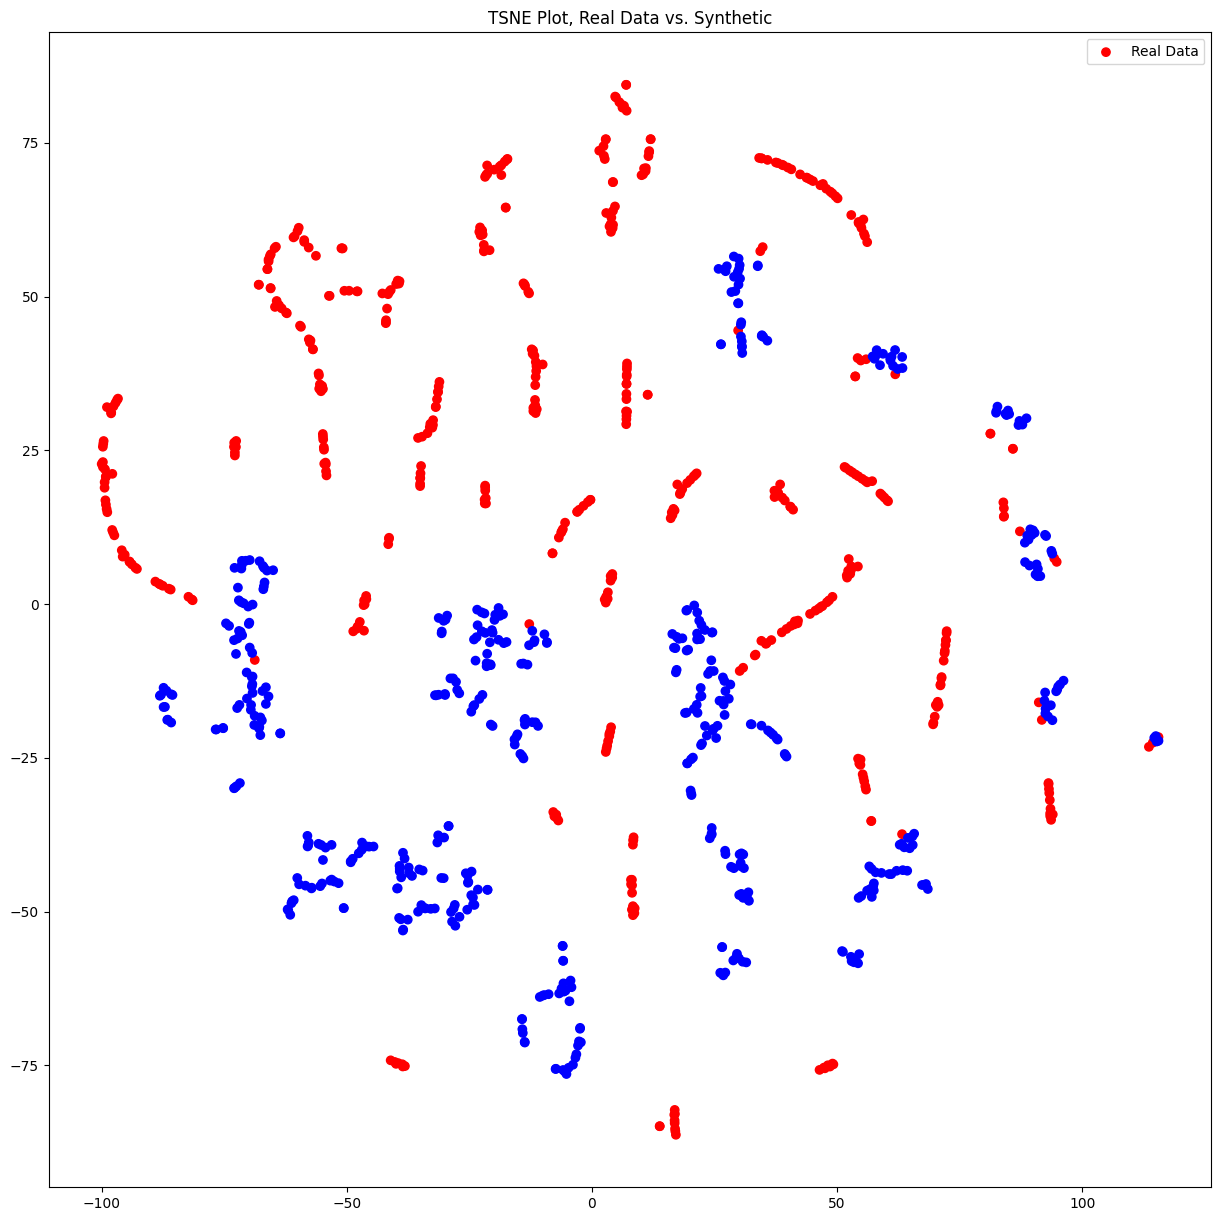

                age     workclass        fnlwgt     education  education-num  \
count  12499.000000  12499.000000  1.249900e+04  12499.000000   12499.000000   
mean      38.604688      3.864229  1.898036e+05     10.349948      10.087527   
std       13.546273      1.460928  1.058850e+05      3.848126       2.579202   
min       17.000000      0.000000  1.376900e+04      0.000000       1.000000   
25%       28.000000      4.000000  1.172245e+05      9.000000       9.000000   
50%       37.000000      4.000000  1.780330e+05     11.000000      10.000000   
75%       48.000000      4.000000  2.377925e+05     12.000000      12.000000   
max       90.000000      8.000000  1.455435e+06     15.000000      16.000000   

       marital-status    occupation  relationship          race           sex  \
count    12499.000000  12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.583807      6.573006      1.447076      3.658453      0.670134   
std          1.508576      4.207988 

(RidgeClassifier(), RidgeClassifier())

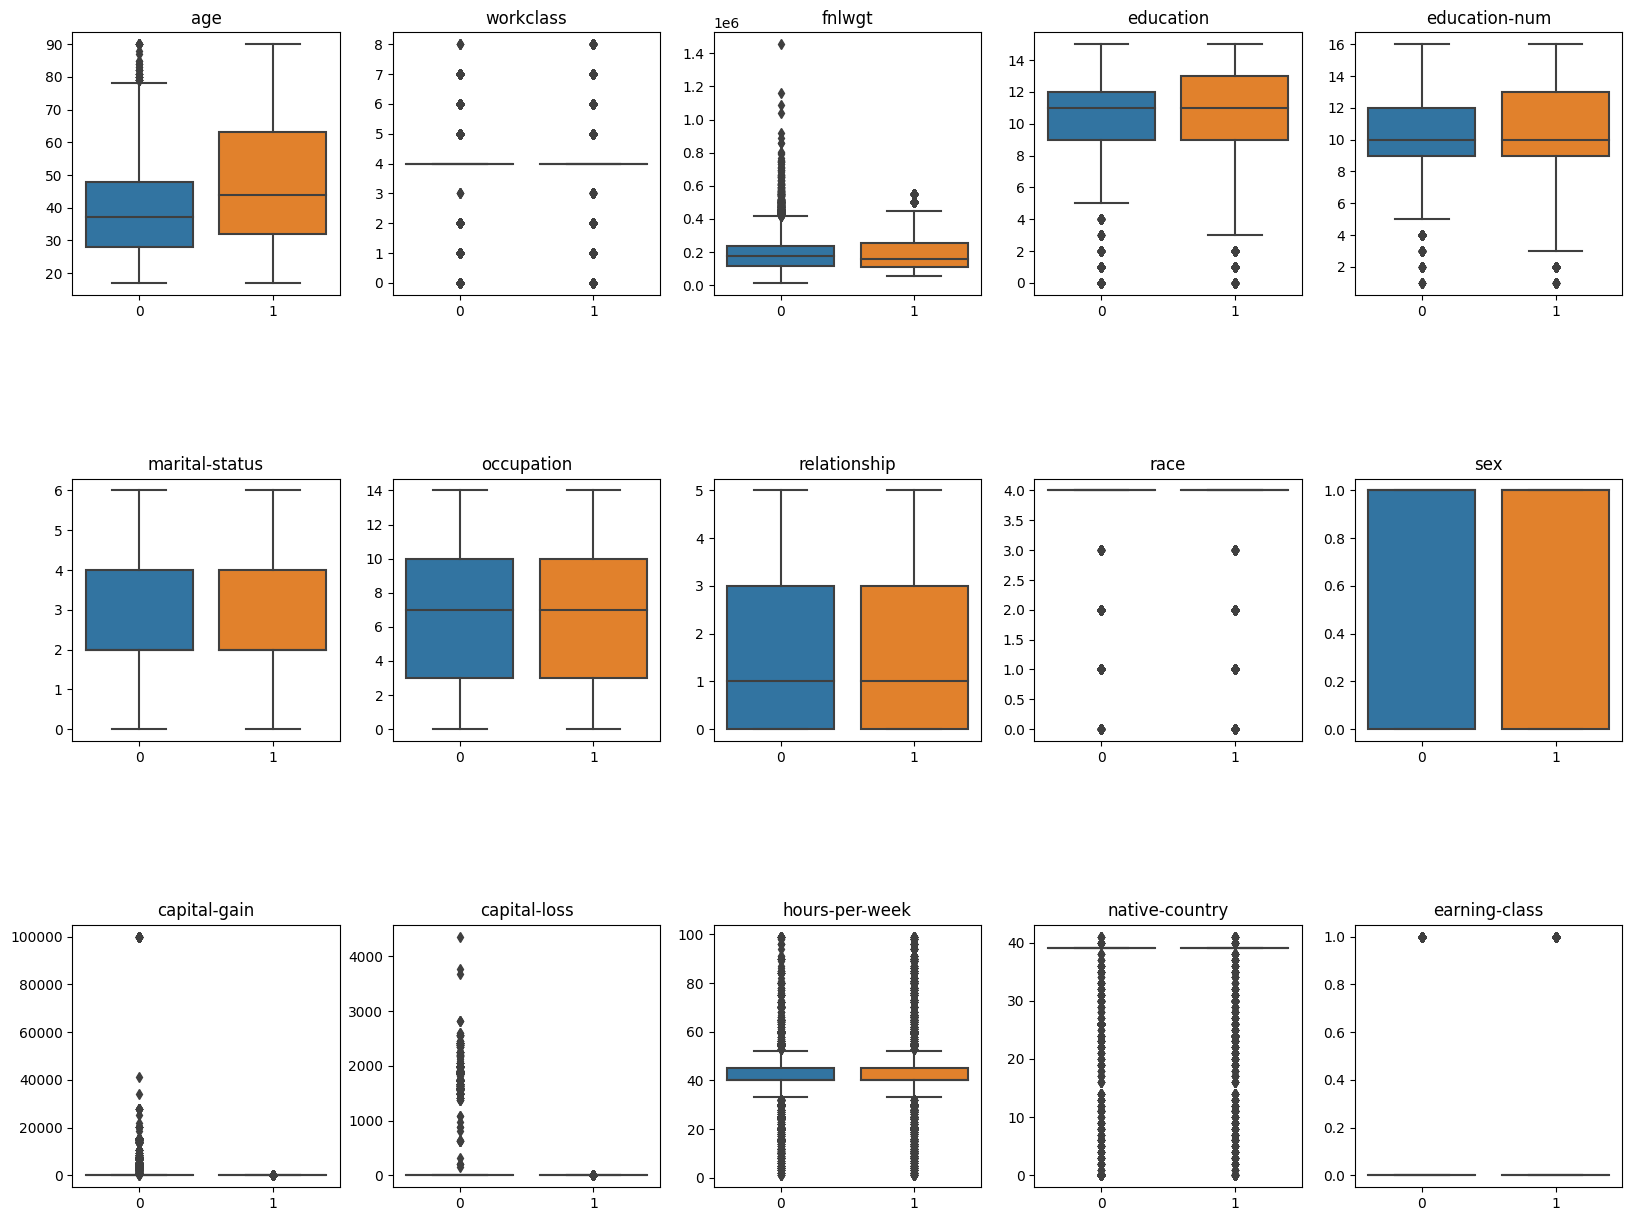

In [6]:

utils.test_real_vs_synthetic_data(adult, synthetic, RidgeClassifier, tsne=True, box=True, describe=True)


Trained on Real Data
              precision    recall  f1-score   support

           0       0.91      0.62      0.74      1899
           1       0.40      0.80      0.53       601

    accuracy                           0.66      2500
   macro avg       0.65      0.71      0.64      2500
weighted avg       0.79      0.66      0.69      2500

Accuracy real: 0.6644

Trained on Synthetic Data
              precision    recall  f1-score   support

           0       0.78      0.82      0.80      1899
           1       0.33      0.27      0.30       601

    accuracy                           0.69      2500
   macro avg       0.55      0.55      0.55      2500
weighted avg       0.67      0.69      0.68      2500

Accuracy synthetic: 0.6892

Random Guessing
              precision    recall  f1-score   support

           0       0.76      0.50      0.60      1913
           1       0.23      0.48      0.31       587

    accuracy                           0.50      2500
   macro avg 

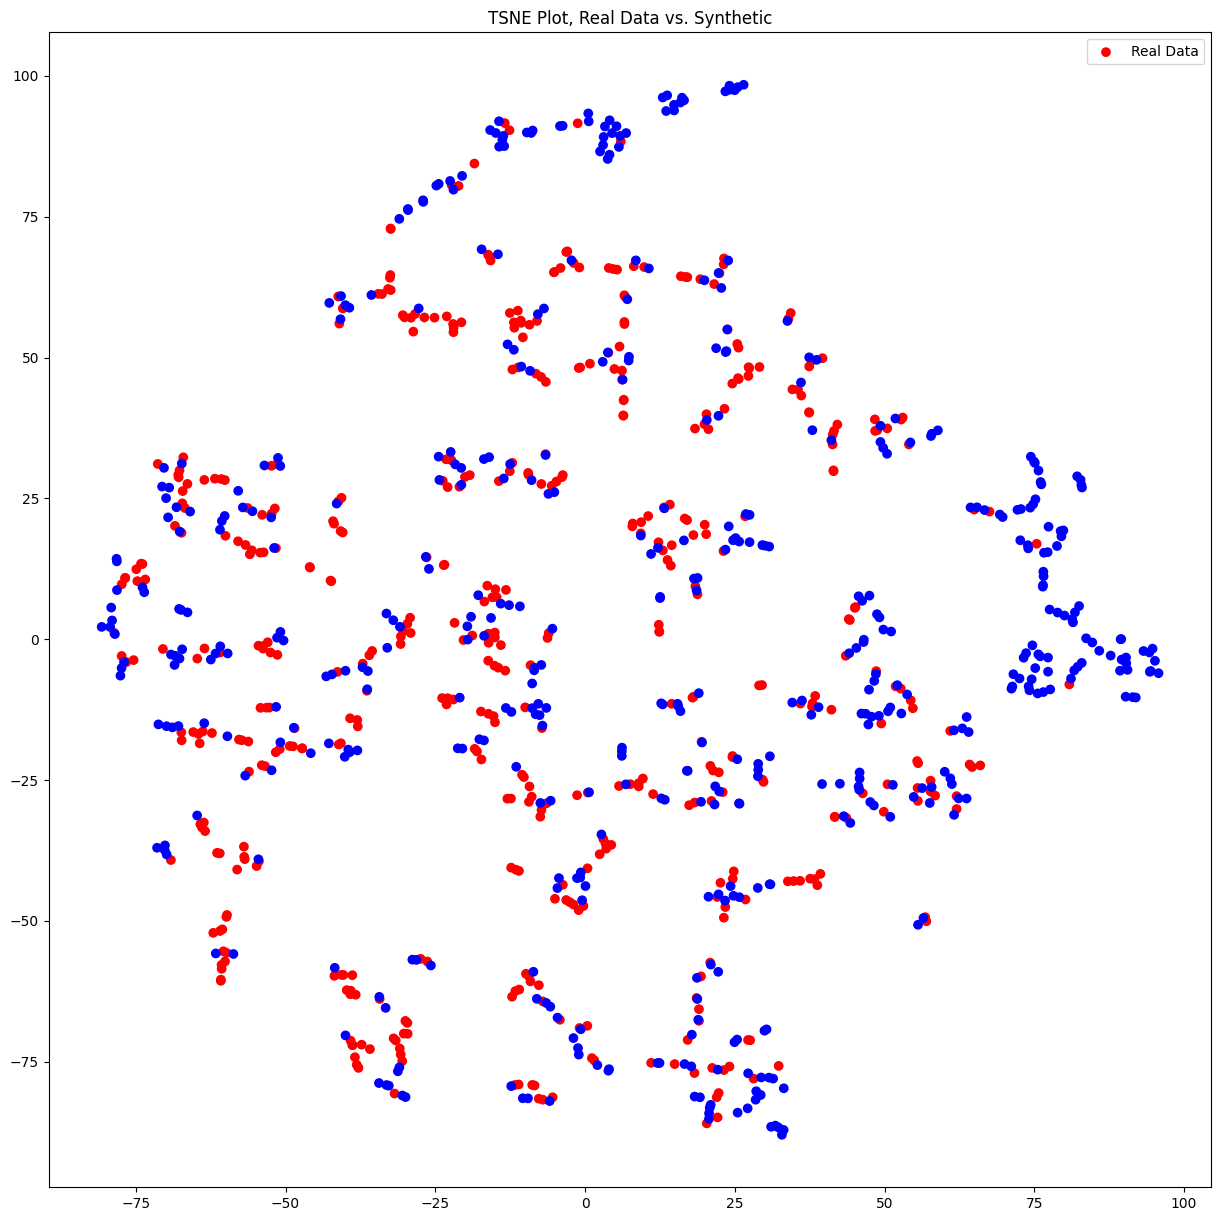

                age     workclass     education  education-num  \
count  12499.000000  12499.000000  12499.000000   12499.000000   
mean      38.604688      3.864229     10.349948      10.087527   
std       13.546273      1.460928      3.848126       2.579202   
min       17.000000      0.000000      0.000000       1.000000   
25%       28.000000      4.000000      9.000000       9.000000   
50%       37.000000      4.000000     11.000000      10.000000   
75%       48.000000      4.000000     12.000000      12.000000   
max       90.000000      8.000000     15.000000      16.000000   

       marital-status    occupation  relationship          race  \
count    12499.000000  12499.000000  12499.000000  12499.000000   
mean         2.583807      6.573006      1.447076      3.658453   
std          1.508576      4.207988      1.610240      0.860624   
min          0.000000      0.000000      0.000000      0.000000   
25%          2.000000      3.000000      0.000000      4.000000   
50%

(ComplementNB(), ComplementNB())

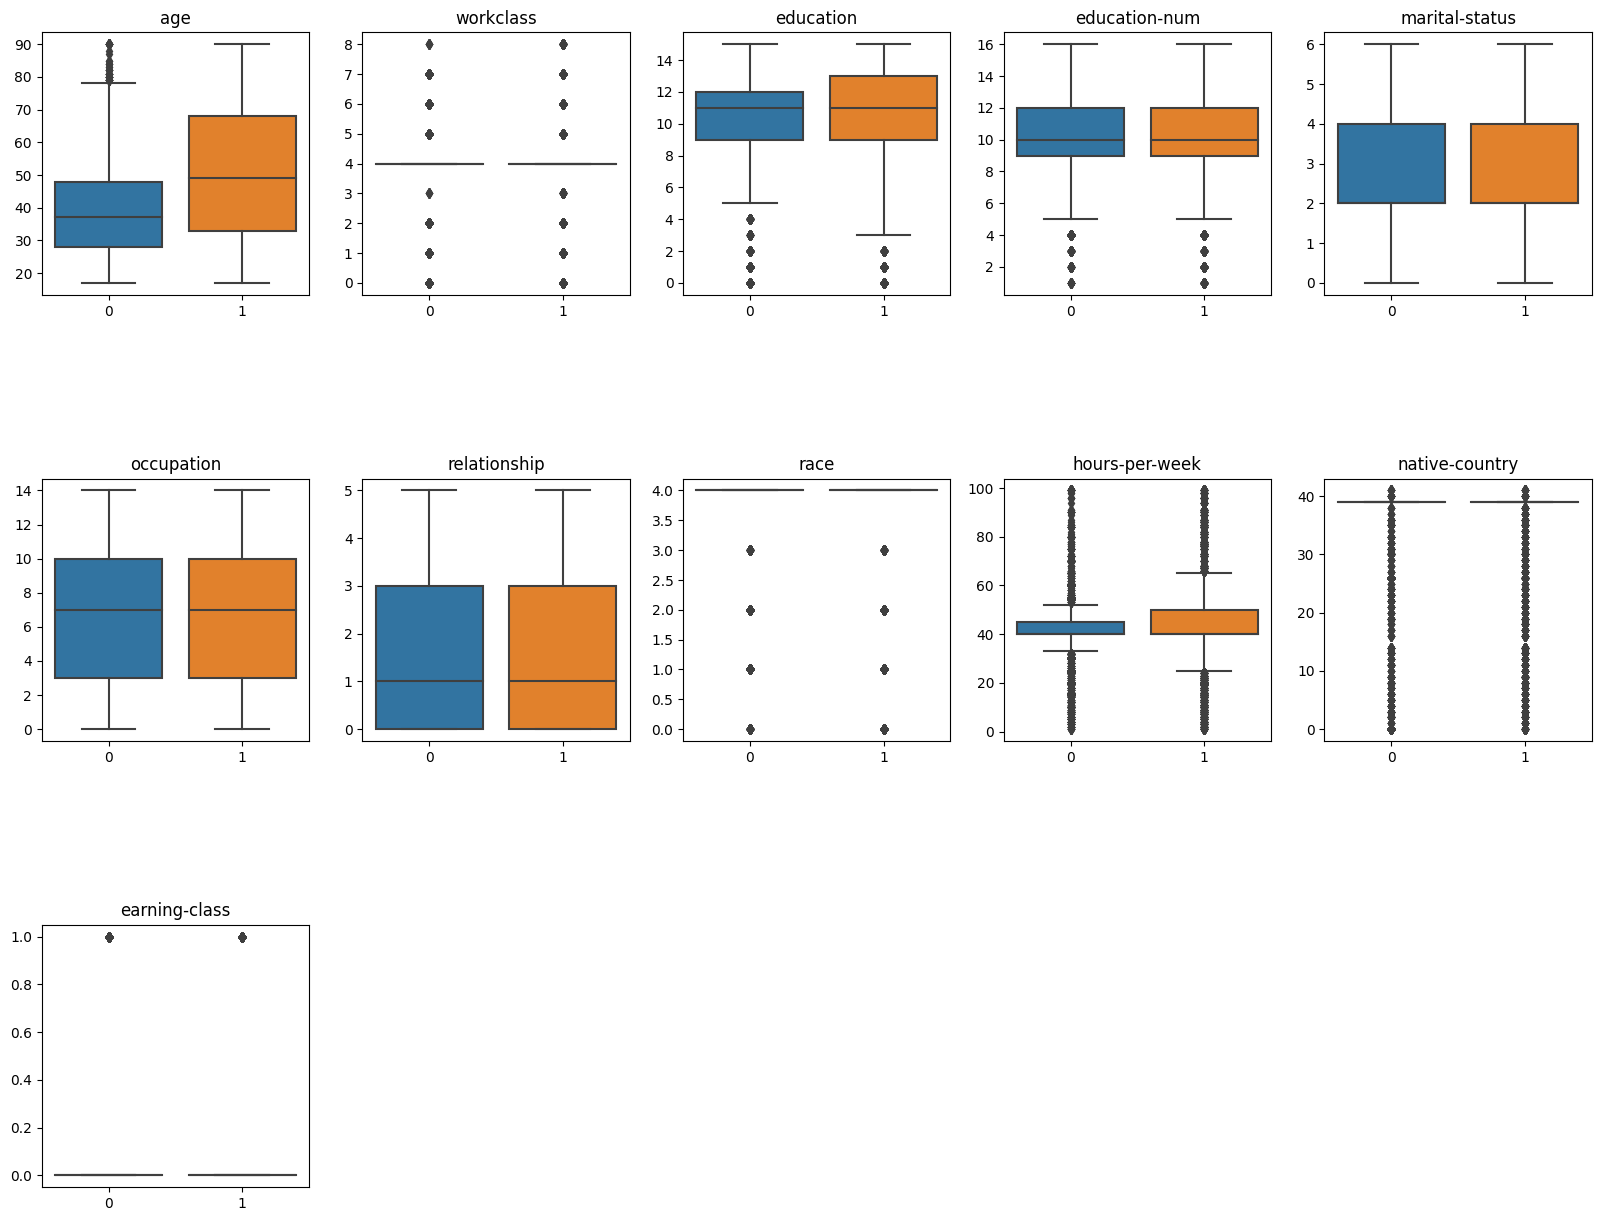

In [7]:
utils.test_real_vs_synthetic_data(adult_cat_ord, synthetic_cat_ord, ComplementNB, tsne=True, box=True, describe=True)